### Final Project JC-DS 02 - Purwadhika Bandung

In this project I am using Employee Database of an Indian Medical Supply/Pharmaceutical Company downloaded from Kaggle. <br>This project goals is to predict employee attrition or in a simple explanation, predict the probability of an employee to resign/retire from their jobs. The main purpose is not to predict whether certain individual tends to leave or not, but to create a platform for better decision making in HR policy and management based on data regarding employee attrition.

<b> Column Description</b>
<br>Age	                 = Age of the employee
<br>Attrition            = Whether the employee left in the previous year or not
<br>BusinessTravel       = Frequency of employees travelled for business purposes in the last year
<br>Department           = Department in company
<br>DistanceFromHome     = Distance from home in kms
<br>Education            = Education Level(Below College, College, Bachelor, Master, Doctor)
<br>EducationField       = Field of education
<br>EmployeeCount	     = Employee count
<br>EmployeeNumber       = Employee number/id
<br>Gender	             = Gender of employee
<br>JobLevel	         = Job level at company on a scale of 1 to 5
<br>JobRole              = Name of job role in company
<br>MaritalStatus	     = Marital status of the employee
<br>MonthlyIncome	     = Monthly income in rupees per month
<br>NumCompaniesWorked   = Total number of companies the employee has worked for
<br>Over18	             = Whether the employee is above 18 years of age or not
<br>PercentSalaryHike    = Percent salary hike for last year
<br>StandardHours	     = Standard hours of work for the employee
<br>StockOptionLevel     = Stock option level of the employee
<br>TotalWorkingYears    = Total number of years the employee has worked so far
<br>TrainingTimesLastYear= Number of times training was conducted for this employee last year
<br>YearsAtCompany	     = Total number of years spent at the company by the employee
<br>YearsSinceLastProm.  = Number of years since last promotion
<br>YearsWithCurrManager = Number of years under current manager

<br><b>Columns below show a score between 1(lowest) to 4(highest). </b>
<br>JobSatisfaction	     = Job Satisfaction Level
<br>WorkLifeBalance	     = Work life balance level
<br>EnvironmentSatis.    = Work Environment Satisfaction Level
<br>JobInvolvement	     = Job Involvement Level
<br>PerformanceRating    = Performance rating for last year

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Get the General Data

In [2]:
df = pd.read_csv('general_data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


We have some NaN values in 'TotalWorkingYears' and 'NumCompaniesWorked' column. 
<br>I will use mean of those column from groupby feature to fill the NaN values.

<b>Fill NaN for 'TotalWorkingYears' and 'NumCompaniesWorked' column.

In [6]:
df[df['TotalWorkingYears'].isna()].head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,...,1.0,Y,14,8,0,NaN,4,20,11,6
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,1,138,Female,...,7.0,Y,14,8,2,NaN,3,3,1,2
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,309,Male,...,4.0,Y,13,8,1,NaN,2,5,1,3
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,1,575,Male,...,7.0,Y,16,8,1,NaN,2,6,1,3
1517,36,No,Non-Travel,Research & Development,5,4,Life Sciences,1,1518,Male,...,7.0,Y,21,8,0,NaN,4,9,0,8


check the data normality after groupby

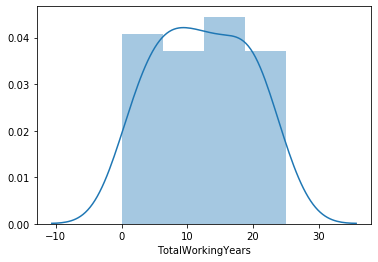

In [7]:
sns.distplot(df.groupby(['Age'])['TotalWorkingYears'].mean())

In [8]:
df['TotalWorkingYears'] = df.groupby(['Age','YearsAtCompany'])['TotalWorkingYears'].transform(lambda x: x.fillna(round(x.mean())))

In [9]:
df[df['NumCompaniesWorked'].isna()].head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,...,NaN,Y,12,8,1,5.0,2,5,0,4
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,...,NaN,Y,11,8,1,18.0,2,10,6,9
343,40,No,Travel_Frequently,Sales,9,3,Marketing,1,344,Male,...,NaN,Y,14,8,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,1,477,Male,...,NaN,Y,21,8,1,4.0,2,4,1,1
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,1,648,Female,...,NaN,Y,16,8,1,9.0,2,7,1,7


check the data normality after groupby

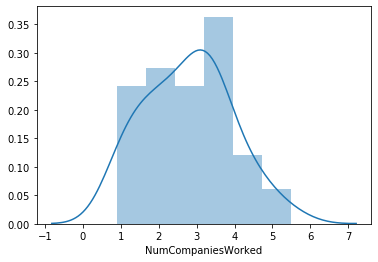

In [10]:
sns.distplot(df.groupby(['Age'])['NumCompaniesWorked'].mean())

In [11]:
df['NumCompaniesWorked'] = df.groupby(['Age','YearsAtCompany','TotalWorkingYears'])['NumCompaniesWorked'].transform(lambda x: x.fillna(round(x.mean())))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### Import absence columns using the in_time data 
<br> data are used to calculate employee absence I count the NaN value as absent. If an employee did not come to work in certain day, the data are not recorded, so it will became NaN.

In [13]:
absence = pd.read_csv('in_time.csv')
absence.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [14]:
x = absence.columns
absent = []
for i in x:
    a = absence[i].isna().sum()
    absent.append(a)
print(absent)

[0, 4410, 209, 206, 228, 209, 243, 215, 239, 265, 4410, 236, 264, 228, 241, 240, 240, 249, 4410, 217, 212, 276, 208, 208, 206, 212, 211, 211, 224, 219, 226, 236, 212, 222, 244, 229, 217, 212, 241, 226, 234, 238, 236, 254, 228, 231, 4410, 242, 232, 243, 232, 219, 191, 219, 231, 237, 239, 223, 207, 217, 203, 218, 235, 222, 211, 218, 203, 234, 234, 224, 239, 232, 218, 213, 207, 228, 214, 223, 235, 240, 197, 222, 220, 251, 215, 238, 213, 4410, 204, 219, 233, 223, 231, 229, 229, 213, 212, 207, 230, 217, 228, 227, 245, 237, 220, 221, 222, 235, 221, 241, 211, 228, 203, 231, 204, 227, 211, 224, 231, 246, 226, 215, 225, 231, 244, 237, 249, 231, 234, 247, 225, 221, 221, 216, 216, 190, 199, 230, 209, 231, 222, 228, 4410, 213, 211, 212, 243, 238, 205, 212, 204, 226, 204, 220, 208, 206, 224, 232, 197, 237, 255, 245, 236, 230, 194, 233, 220, 219, 218, 238, 215, 201, 208, 226, 223, 232, 224, 230, 231, 245, 226, 204, 212, 244, 210, 220, 4410, 202, 230, 235, 216, 244, 240, 217, 219, 219, 219, 4410, 250

Some of the columns had a total NaN value same as the amount of the data, so it can be said that all of the employee did not came to work that day, whether it an error or an uncoounted 'holydays'. I assumed those data not counted as absence, so I will substract the total absence with the number of days with 4410 absence.

In [15]:
not_count = []
for i in absent:
    if i == 4410:
        not_count.append(i)
len(not_count)

12

In [16]:
new_absent = []
for i in range(len(absence)):
    a = absence.loc[i].isna().sum()
    f = a - 12
    new_absent.append(f)
print(new_absent)

[17, 13, 7, 14, 4, 12, 17, 6, 19, 15, 8, 8, 20, 14, 8, 12, 22, 3, 17, 18, 17, 16, 17, 7, 18, 8, 10, 13, 6, 19, 11, 7, 15, 6, 9, 17, 7, 19, 22, 10, 5, 14, 7, 9, 5, 9, 14, 12, 22, 21, 7, 12, 10, 13, 5, 12, 4, 22, 6, 10, 5, 10, 18, 6, 12, 2, 17, 22, 21, 3, 7, 6, 14, 18, 17, 11, 7, 18, 19, 10, 17, 5, 13, 7, 11, 5, 16, 12, 10, 10, 12, 16, 21, 18, 16, 2, 4, 6, 10, 5, 17, 11, 14, 16, 20, 18, 18, 21, 16, 19, 15, 3, 19, 4, 13, 15, 17, 9, 21, 15, 14, 13, 19, 18, 9, 18, 13, 9, 9, 19, 14, 4, 14, 11, 22, 15, 17, 22, 11, 17, 16, 17, 4, 10, 4, 8, 13, 13, 6, 12, 14, 16, 19, 17, 12, 11, 13, 22, 12, 19, 22, 15, 7, 12, 15, 10, 18, 6, 9, 18, 19, 7, 15, 8, 15, 15, 13, 15, 5, 8, 7, 21, 12, 13, 5, 15, 18, 15, 19, 16, 5, 7, 7, 13, 23, 5, 21, 8, 15, 8, 10, 19, 20, 21, 12, 16, 9, 21, 10, 8, 5, 8, 7, 10, 12, 8, 18, 7, 17, 5, 22, 3, 16, 18, 10, 10, 15, 10, 6, 7, 14, 4, 7, 6, 12, 21, 16, 10, 19, 18, 22, 14, 7, 12, 14, 10, 21, 5, 11, 15, 12, 7, 21, 12, 19, 11, 3, 18, 15, 8, 7, 20, 19, 15, 20, 3, 17, 8, 16, 15, 3, 1

In [17]:
df['Absence'] = new_absent

### Import employee survey and manager survey data
<br> data are used to add features for predicting employee Attrition, it should enriched our data because those data is generated by direct polls or questionaire with respective person/parties.

In [18]:
employee = pd.read_csv('employee_survey_data.csv')
manager  = pd.read_csv('manager_survey_data.csv')

In [19]:
manager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [20]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


I found some NaN values on the data, in this case 'generalization' methods will be used because it's a polling generated data, means the majority will win. I will use the data Mode to fill the NaN values.

In [21]:
len(employee)

4410

In [22]:
employee.groupby(['WorkLifeBalance']).agg(pd.Series.mode)

,EnvironmentSatisfaction,JobSatisfaction
WorkLifeBalance,,
1.0,4.0,4.0
2.0,3.0,4.0
3.0,3.0,3.0
4.0,3.0,4.0


In [23]:
employee.groupby(['JobSatisfaction']).agg(pd.Series.mode)

,EnvironmentSatisfaction,WorkLifeBalance
JobSatisfaction,,
1.0,3.0,3.0
2.0,4.0,3.0
3.0,4.0,3.0
4.0,3.0,3.0


In [24]:
employee['EnvironmentSatisfaction'].fillna(3, inplace=True)
employee['JobSatisfaction'].fillna(4, inplace=True)
employee['WorkLifeBalance'].fillna(3, inplace=True)

In [25]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


<b>Join Employee and Manager review data

In [26]:
df = df.join(employee.set_index('EmployeeID'), on='EmployeeID')

In [27]:
df = df.join(manager.set_index('EmployeeID'), on='EmployeeID')

In [28]:
df[['JobInvolvement', 'PerformanceRating']] = df[['JobInvolvement', 'PerformanceRating']].astype('float')

<b>Drop 'EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours' columns, because it not necessary as the value contains non-essentials data for the modelling.

In [29]:
df.drop(['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], axis=1, inplace=True )

Map Education columns so it more representative with categories from the columns info.

In [30]:
df['Education'] = df['Education'].map({1 : 'Below College',
                                       2 : 'College',
                                       3 : 'Bachelor',
                                       4 : 'Master',
                                       5 : 'Doctor'})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   object 
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [32]:
df['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

<b>Review the Dataframe before exporting

In [33]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Absence,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,Healthcare Representative,...,6,1,0,0,17,3.0,4.0,2.0,3.0,3.0
1,31,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,Female,1,Research Scientist,...,3,5,1,4,13,3.0,2.0,4.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,Male,4,Sales Executive,...,2,5,0,3,7,2.0,2.0,1.0,3.0,3.0
3,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,Male,3,Human Resources,...,5,8,7,5,14,4.0,4.0,3.0,2.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,Below College,Medical,Male,1,Sales Executive,...,2,6,0,4,4,4.0,1.0,3.0,3.0,3.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   object 
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

#### Export clean dataframe

In [35]:
df.to_csv('cleaned_data.csv', index=False)

In [36]:
check = pd.read_csv('cleaned_data.csv')
check.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Absence,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,Healthcare Representative,...,6,1,0,0,17,3.0,4.0,2.0,3.0,3.0
1,31,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,Female,1,Research Scientist,...,3,5,1,4,13,3.0,2.0,4.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,Male,4,Sales Executive,...,2,5,0,3,7,2.0,2.0,1.0,3.0,3.0
3,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,Male,3,Human Resources,...,5,8,7,5,14,4.0,4.0,3.0,2.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,Below College,Medical,Male,1,Sales Executive,...,2,6,0,4,4,4.0,1.0,3.0,3.0,3.0


### Data Cleaning and Preprocessing is Finished, now move to EDA